### Example: using US sampler to sample a 2D Gaussian pdf

In [1]:
import numpy as np

# define a desired covariance matrix for 2D Gaussian
cov = [[1.0, 0.95], [0.95, 1.0]]
icov = np.linalg.inv(cov)

In [2]:
import usample.usample
import numpy as np
import emcee

def log_prob_fn(p, means, icov):
        
    lpf = - 0.5 * np.dot(p , np.dot( icov , p ) )
    
    return lpf

icov = [[ 10.25641026,  -9.74358974], [ -9.74358974,  10.25641026]]
means = [0., 0.]

us = usample.UmbrellaSampler( log_prob_fn , lpfargs=[means,icov],   debug=True,  burn_acor=20 )

#
# Now add some umbrellas.
# First, define some temperatures to run with. 
#

temps = np.linspace( 1 , 10 , 8 ) 

#
# Then add an umbrella at each temperature. Use four walkers, and give some initial conditions
# Can be added individually, or in bulk:
#

us.add_umbrellas( temps , numwalkers=8 , ic=means , sampler=emcee.EnsembleSampler )

# 
# Then run for 10000 steps in each window.
# Output stats every [freq] steps
# Try to replica exchange [repex]-many walkers every [freq] steps
#
# stop when GR indicator drops to 0.01

pos_us, weights, prob = us.run(10000 , freq=1000, repex=10, grstop = 0.01   )

    [d]: Total windows: 8
    [d]: Temperatures: [  1.           2.28571429   3.57142857   4.85714286   6.14285714
   7.42857143   8.71428571  10.        ]
 :- Completed 1000 of 10000 iterations.
    [d]: max gr: 0.0290366819708
    [d]: Repex summary (90.0 %):  [  8.   7.  10.  10.   9.   9.  10.   0.]
 :- Completed 2000 of 10000 iterations.
    [d]: max gr: 0.0298258029755
    [d]: Repex summary (80.0 %):  [  5.   5.   9.   9.  10.   9.   9.   0.]
 :- Completed 3000 of 10000 iterations.
    [d]: max gr: 0.0150566197596
    [d]: Repex summary (80.0 %):  [  6.   8.  10.   7.   7.   8.  10.   0.]
 :- Completed 4000 of 10000 iterations.
    [d]: max gr: 0.0151367911946
    [d]: Repex summary (87.14 %):  [  8.   8.  10.   7.   9.   9.  10.   0.]
 :- Completed 5000 of 10000 iterations.
    [d]: max gr: 0.0168108449138
    [d]: Repex summary (81.42 %):  [  6.   7.   9.   9.   9.  10.   7.   0.]
 :- Completed 6000 of 10000 iterations.
    [d]: max gr: 0.0114990591942
    [d]: Repex summary (

In [16]:
print("shape of weights array: %s and walker position array: %s"%(str(np.shape(weights)), 
                                                                  str(np.shape(pos_us[:,0]))))

shape of weights array: (448000L,) and walker position array: (448000L,)


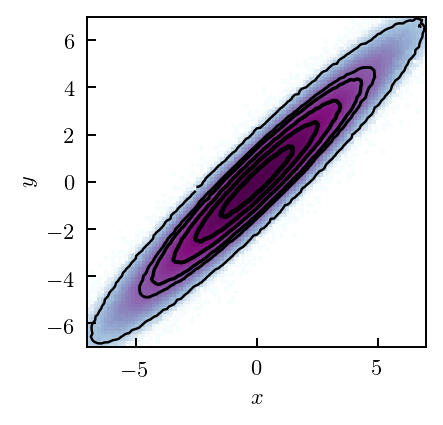

In [11]:
%matplotlib inline 

from plot_utils import plot_pretty, plot_2d_dist

plot_pretty()
x1d = pos_us[:,0]; x2d = pos_us[:,1]; 
weights = weights.ravel()

clevs = (0.683, 0.955, 0.997, 0.9999, 0.99999, 0.9999999999) # contour levels to plot

plot_2d_dist(x1d, x2d, xlim=[-7,7], ylim =[-7,7], nxbins=100, nybins=100, 
             clevs=clevs, weights=weights, smooth=None, 
             xlabel='$x$', ylabel='$y$')